In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/bangalore-rainfall-data-1900-2024-sept.csv')

In [ ]:
df

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,El NiNo (Y/N),La Nina (Y/N)
0,1901,0.0,78.9,0.0,24.3,146.0,47.7,71.6,71.6,318.5,120.3,37.3,23.1,939.3,Y,N
1,1902,0.7,0.0,17.0,58.1,197.8,62.2,32.0,79.5,213.6,219.9,11.1,25.4,917.3,N,N
2,1903,0.0,0.0,0.0,1.5,63.7,109.2,27.9,189.7,475.2,171.1,233.6,29.4,1301.3,Y,N
3,1904,0.5,0.0,0.0,14.4,241.5,49.5,149.3,53.8,126.4,157.2,0.0,1.7,794.3,N,Y
4,1905,1.7,0.0,56.6,32.7,90.6,60.7,58.9,266.4,62.4,227.8,29.2,3.0,890.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2022,3.9,0.0,0.0,61.4,270.2,255.5,136.7,378.7,353.0,296.5,59.8,74.7,1957.7,N,Y
122,2023,0.0,0.0,8.4,28.2,305.5,72.3,141.5,12.6,248.4,96.0,106.6,0.7,1020.2,Y,N
123,2024,0.0,0.0,0.0,0.0,180.9,204.7,92.8,230.2,23.9,NaN,NaN,NaN,NaN,Y,Y
124,LPA (1991-2020),1.7,5.9,19.2,73.0,133.0,111.0,112.8,160.2,198.4,180.7,63.4,14.8,1077.1,NaN,NaN


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug',
       'sept', 'oct', 'nov', 'dec', 'total', 'el nino (y/n)', 'la nina (y/n)'],
      dtype='object')

In [ ]:
df.drop(index=[123,124,125], axis=0, inplace=True)

In [ ]:
df.drop(['total', 'el nino (y/n)', 'la nina (y/n)'], axis=1, inplace=True)

In [ ]:
df_long = pd.melt(df, id_vars=["year"], var_name="month", value_name="rainfall(in mm)")

In [ ]:
df_long

,year,month,rainfall(in mm)
0,1901,jan,0.0
1,1902,jan,0.7
2,1903,jan,0.0
3,1904,jan,0.5
4,1905,jan,1.7
...,...,...,...
1471,2019,dec,12.6
1472,2020,dec,20.4
1473,2021,dec,5.4
1474,2022,dec,74.7


In [ ]:
# Step 4 (optional): Sort by Year and Month (chronologically)
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
df_long['month'] = pd.Categorical(df_long['month'], categories=month_order, ordered=True)
df_long = df_long.sort_values(by=['year', 'month'])

# Step 5: Display the result
print(df_long.reset_index(drop=True))

      year month  rainfall(in mm)
0     1901   jan              0.0
1     1901   feb             78.9
2     1901   mar              0.0
3     1901   apr             24.3
4     1901   may            146.0
...    ...   ...              ...
1471  2023   aug             12.6
1472  2023  sept            248.4
1473  2023   oct             96.0
1474  2023   nov            106.6
1475  2023   dec              0.7

[1476 rows x 3 columns]


In [ ]:
df_long['date'] = pd.to_datetime(df_long['year'].astype(str) + '-' + df_long['month'].str.slice(0, 3), format='%Y-%b')

In [ ]:
df_long.drop(['year', 'month'], axis=1, inplace=True)

In [ ]:
df_long.reset_index(drop=True, inplace=True)

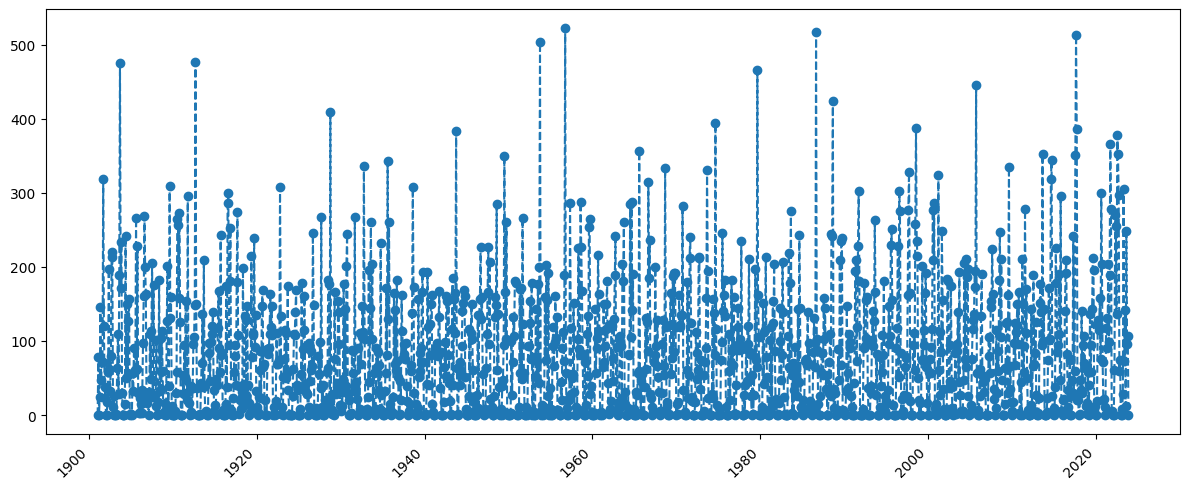

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_long['date'], df_long['rainfall(in mm)'], marker='o', linestyle='dashed')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust spacing
plt.show()

In [ ]:
filter_date='2000-01-01'

In [ ]:
df_filtered=df_long[df_long['date']>=pd.to_datetime(filter_date)]
df_filtered.reset_index(drop=True, inplace=True)

In [ ]:
df_filtered

,rainfall(in mm),date
0,0.0,2000-01-01
1,57.7,2000-02-01
2,0.0,2000-03-01
3,76.2,2000-04-01
4,56.6,2000-05-01
...,...,...
283,12.6,2023-08-01
284,248.4,2023-09-01
285,96.0,2023-10-01
286,106.6,2023-11-01


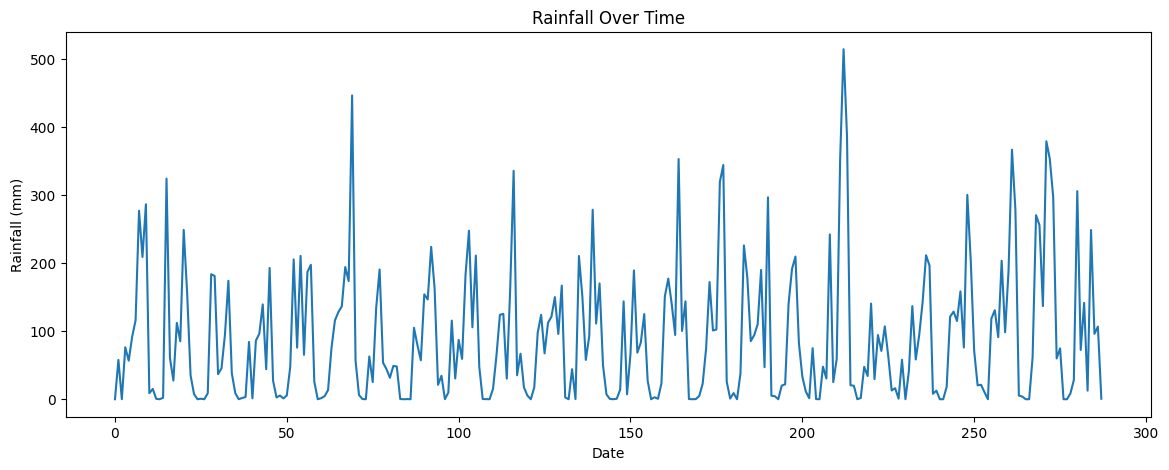

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df_filtered['rainfall(in mm)'])
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Over Time')
plt.show()

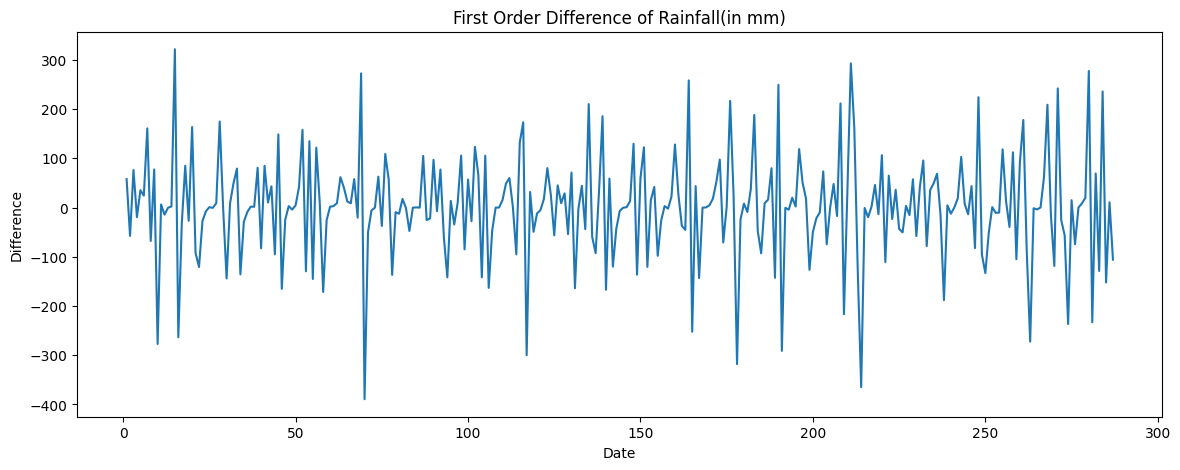

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df_filtered['rainfall(in mm)'].diff().dropna())
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('First Order Difference of Rainfall(in mm)')
plt.show()

In [ ]:
df_filtered['seasonal_diff']=df_filtered['rainfall(in mm)'].diff(12)

<ipython-input-20-872bff5fd794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['seasonal_diff']=df_filtered['rainfall(in mm)'].diff(12)


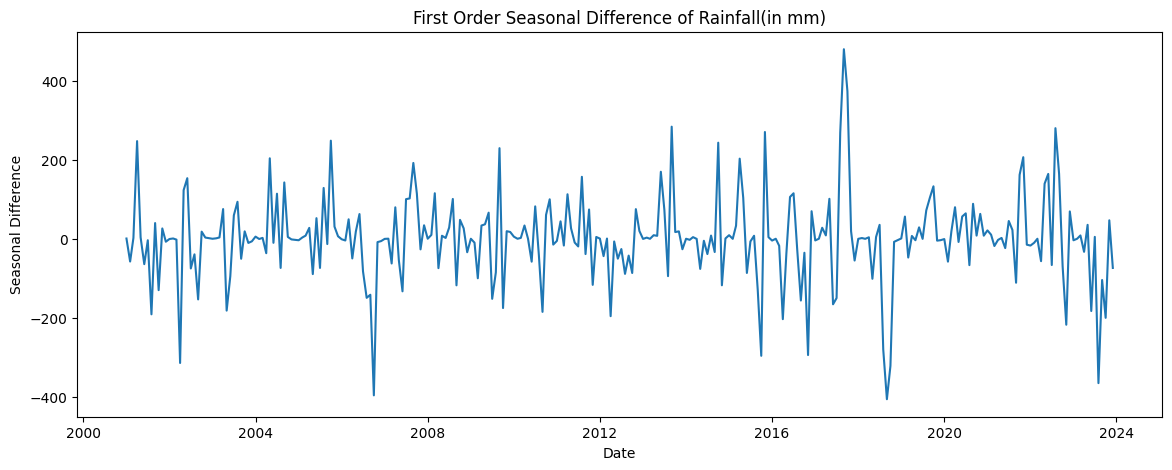

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(df_filtered['date'], df_filtered['seasonal_diff'])
plt.xlabel('Date')
plt.ylabel('Seasonal Difference')
plt.title('First Order Seasonal Difference of Rainfall(in mm)')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 500x500 with 0 Axes>

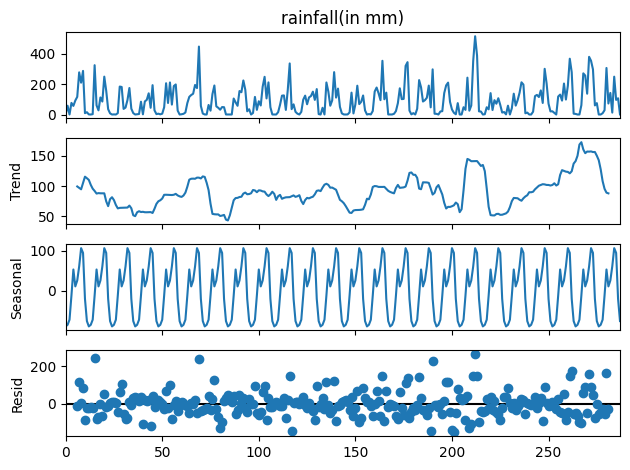

In [ ]:
model=seasonal_decompose(df_filtered['rainfall(in mm)'], model='add', period=12)
plt.figure(figsize=(5,5))
model.plot()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
train_size=int(round(len(df_filtered)*.8, 0))

In [ ]:
df_train=df_filtered.iloc[:train_size]
df_test=df_filtered.iloc[train_size:]

In [ ]:
exp_model=ExponentialSmoothing(df_train['rainfall(in mm)'], trend='add', seasonal='add', seasonal_periods=12).fit()

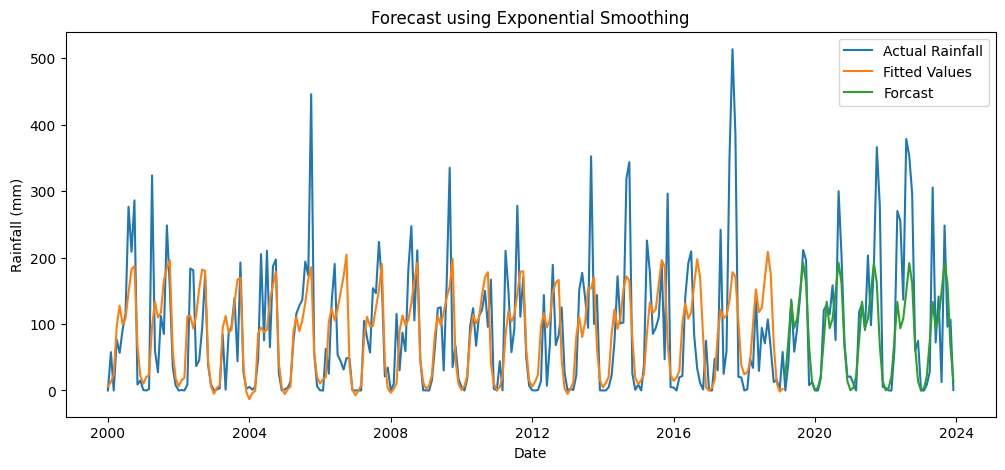

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_filtered['date'], df_filtered['rainfall(in mm)'], label='Actual Rainfall')
plt.plot(df_train['date'], exp_model.fittedvalues, label='Fitted Values')
plt.plot(df_test['date'], exp_model.forecast(steps=len(df_test)), label='Forcast')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Forecast using Exponential Smoothing')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
exp_mse = mean_squared_error(df_test['rainfall(in mm)'], exp_model.forecast(steps=len(df_test)).values)
exp_rmse = np.sqrt(exp_mse)

In [ ]:
df_train_deseason=exp_model.fittedvalues-exp_model.season

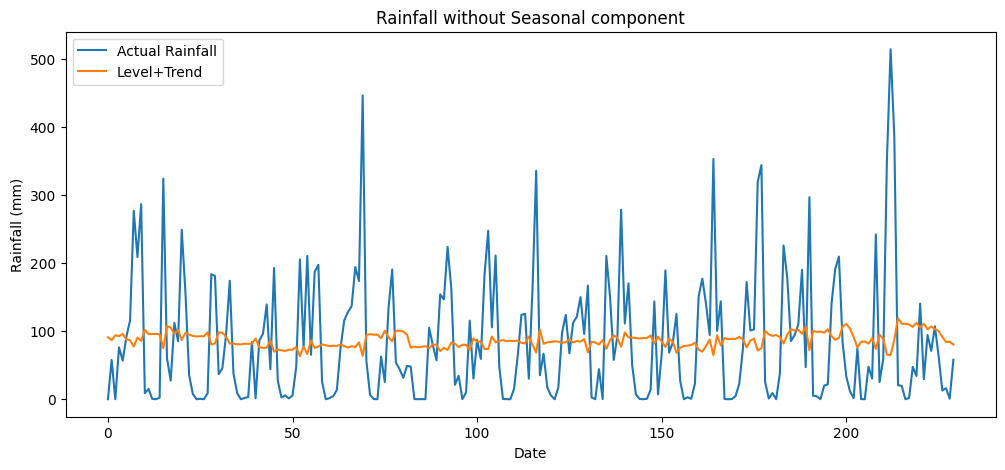

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_train['rainfall(in mm)'], label='Actual Rainfall')
plt.plot(df_train_deseason, label='Level+Trend')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall without Seasonal component')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test=adfuller(df_filtered['rainfall(in mm)'])
print(f'ADF Statisitc: {test[0]}')
print(f'P Value: {test[1]}')
# stationary

ADF Statisitc: -4.135983759584495
P Value: 0.000844057643730151


In [ ]:
test=adfuller(df_filtered['rainfall(in mm)'].diff(12).dropna())
print(f'ADF Statisitc: {test[0]}')
print(f'P Value: {test[1]}')
# stationary

ADF Statisitc: -6.737425111509981
P Value: 3.1813166454052815e-09


In [ ]:
test=adfuller(df_train_deseason)
print(f'ADF Statisitc: {test[0]}')
print(f'P Value: {test[1]}')
# stationary

ADF Statisitc: -2.4564546499627284
P Value: 0.12643195801154833


In [ ]:
test=adfuller(df_train_deseason.diff().dropna())
print(f'ADF Statisitc: {test[0]}')
print(f'P Value: {test[1]}')
# stationary

ADF Statisitc: -6.3867189088183025
P Value: 2.1551802988255594e-08


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

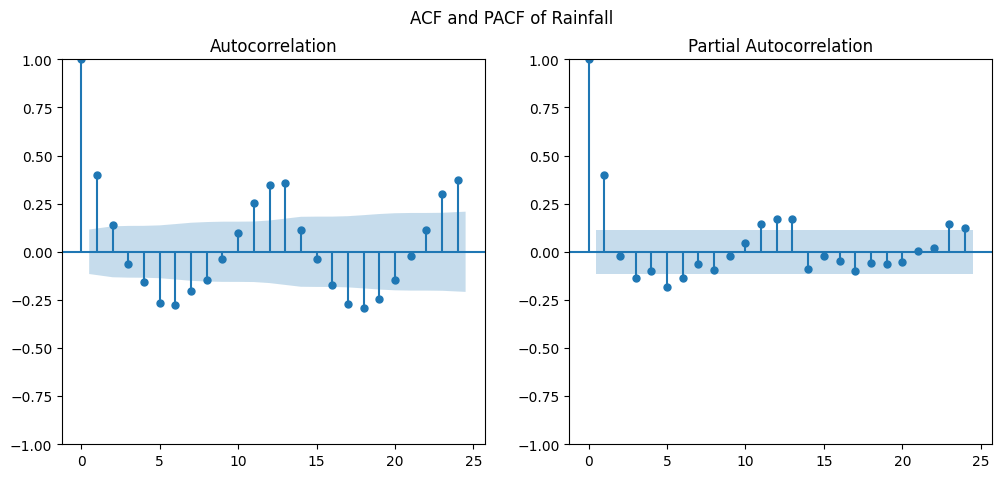

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('ACF and PACF of Rainfall')
plot_acf(df_filtered['rainfall(in mm)'], lags=24, ax=ax1)
plot_pacf(df_filtered['rainfall(in mm)'], lags=24, ax=ax2)
plt.show()

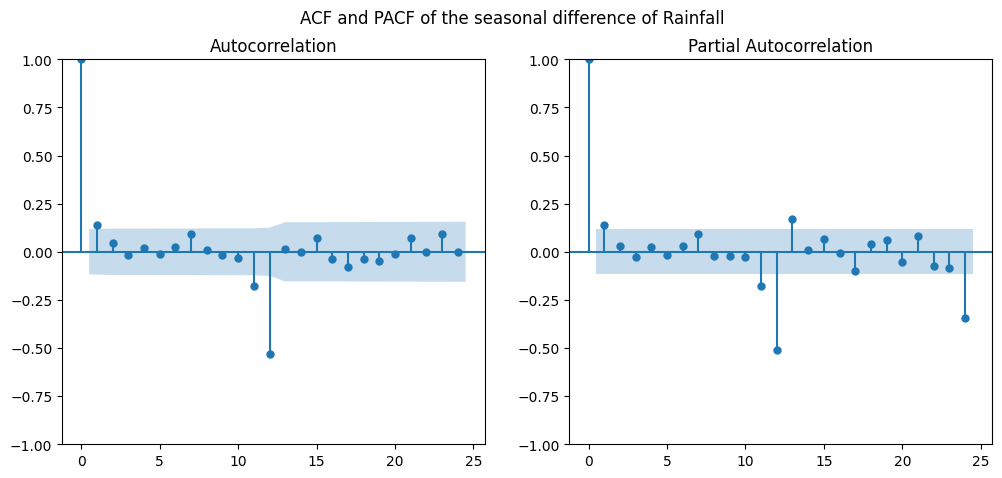

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('ACF and PACF of the seasonal difference of Rainfall')
plot_acf(df_filtered['rainfall(in mm)'].diff(12).dropna(), lags=24, ax=ax1)
plot_pacf(df_filtered['rainfall(in mm)'].diff(12).dropna(), lags=24, ax=ax2)
plt.show()

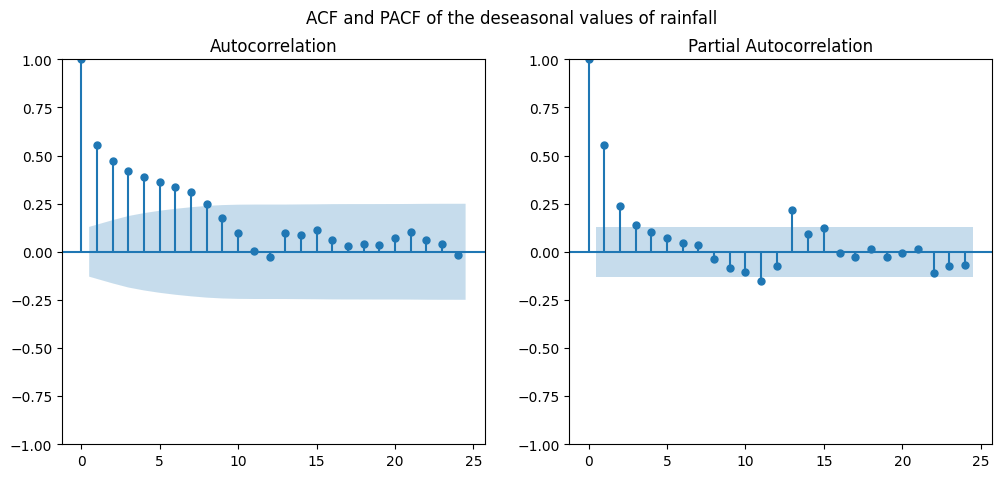

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('ACF and PACF of the deseasonal values of rainfall')
plot_acf(df_train_deseason, lags=24, ax=ax1)
plot_pacf(df_train_deseason, lags=24, ax=ax2)
plt.show()

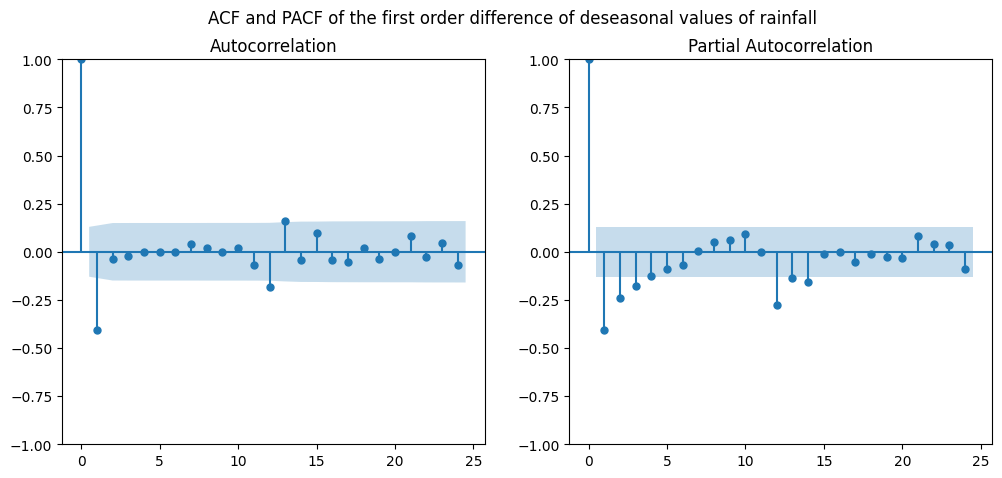

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('ACF and PACF of the first order difference of deseasonal values of rainfall')
plot_acf(df_train_deseason.diff().dropna(), lags=24, ax=ax1)
plot_pacf(df_train_deseason.diff().dropna(), lags=24, ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(df_train['rainfall(in mm)'], order=(1,0,0)).fit()
print(model.bic)

2722.4527698591346


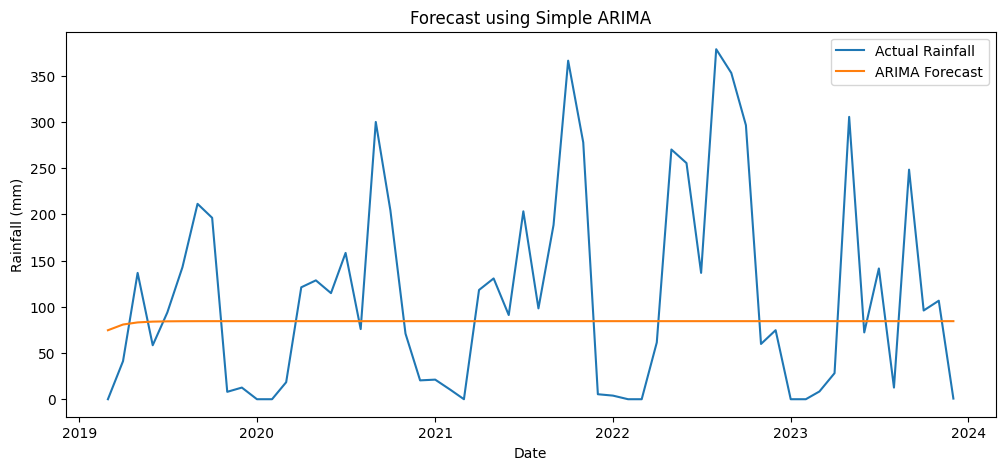

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_test['date'], df_test['rainfall(in mm)'], label='Actual Rainfall')
plt.plot(df_test['date'], model.forecast(steps=len(df_test)), label='ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Forecast using Simple ARIMA')
plt.legend()
plt.show()

In [ ]:
simple_arima_mse = mean_squared_error(df_test['rainfall(in mm)'], model.forecast(steps=len(df_test)))
simple_arima_rmse = np.sqrt(simple_arima_mse)

In [ ]:
print(simple_arima_rmse)

111.62544663682772


In [ ]:
model=ARIMA(df_train['seasonal_diff'], order=(1,0,0)).fit()
print(model.bic)

2687.2431845659135


In [1]:
model.forecast(steps=len(df_test)).head()

NameError: name 'model' is not defined

In [ ]:
simple_arima_mse = mean_squared_error(df_test['rainfall(in mm)'], model.forecast(steps=len(df_test)))
simple_arima_rmse = np.sqrt(simple_arima_mse)

In [ ]:
print(simple_arima_rmse)

157.89972594823945


In [ ]:
seasonal_model=ARIMA(df_train['rainfall(in mm)'], order=(0,0,0), seasonal_order=(1,1,1,12)).fit()
print(seasonal_model.bic)

2524.927745789663


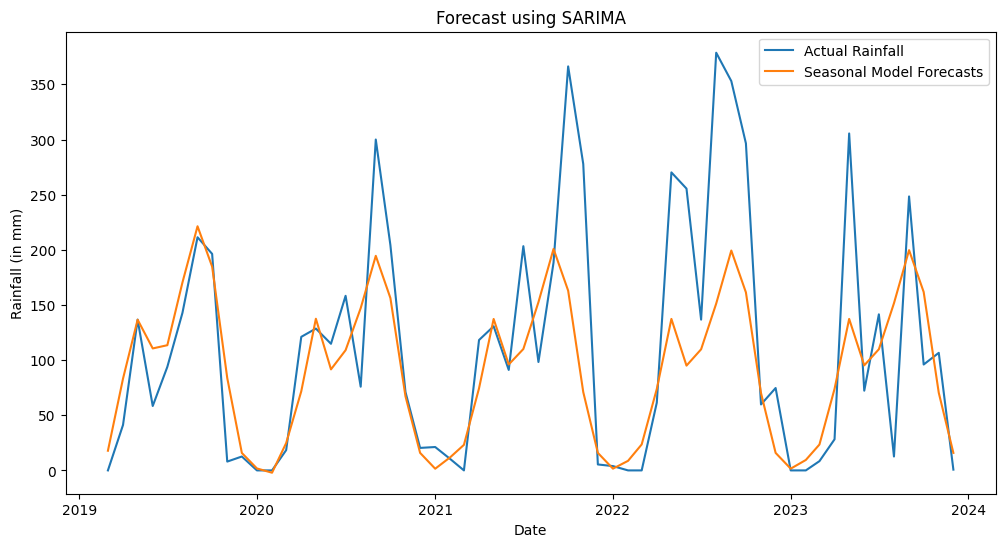

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_test['date'], df_test['rainfall(in mm)'], label='Actual Rainfall')
plt.plot(df_test['date'], seasonal_model.forecast(steps=len(df_test)), label='Seasonal Model Forecasts')
plt.xlabel('Date')
plt.ylabel('Rainfall (in mm)')
plt.title('Forecast using SARIMA')
plt.legend()
plt.show()

In [ ]:
sarima_mse = mean_squared_error(df_test['rainfall(in mm)'], seasonal_model.forecast(steps=len(df_test)))
sarima_rmse = np.sqrt(sarima_mse)

In [ ]:
print(sarima_rmse)

76.19633858271152


In [ ]:
deseason_model=ARIMA(df_train_deseason, order=(0,1,1)).fit()
print(deseason_model.bic)

1651.4352761166479


In [ ]:
deseason_forecast=deseason_model.forecast(steps=len(df_test))
season=exp_model.season[-len(df_test):]
deseason_forecast.reset_index(drop=True, inplace=True)
season.reset_index(drop=True, inplace=True)
forecast=deseason_forecast+season
forecast.head(2)

,0
0,120.728669
1,103.314120


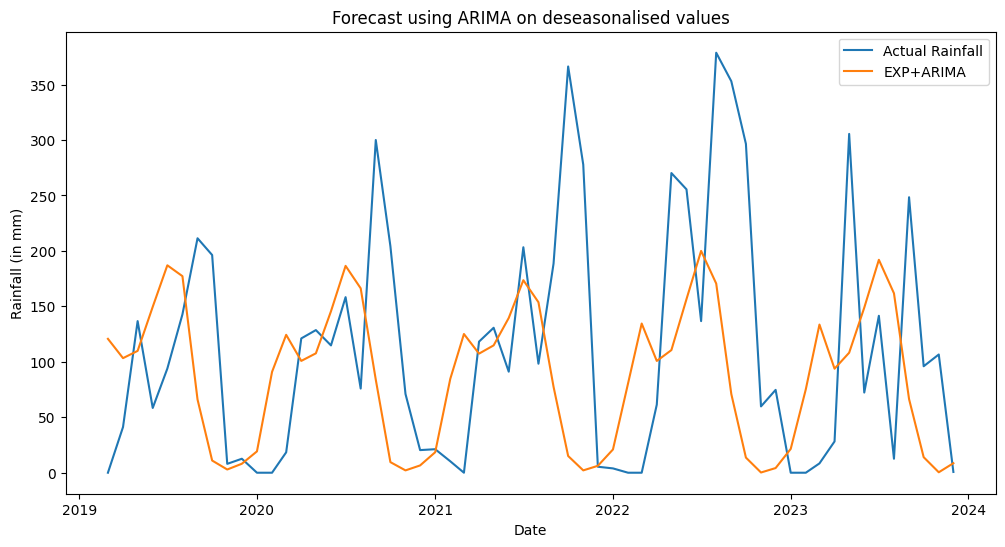

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_test['date'], df_test.reset_index()['rainfall(in mm)'], label='Actual Rainfall')
plt.plot(df_test['date'], forecast, label='EXP+ARIMA')
plt.xlabel('Date')
plt.ylabel('Rainfall (in mm)')
plt.title('Forecast using ARIMA on deseasonalised values')
plt.legend()
plt.show()

In [ ]:
deseason_mse = mean_squared_error(df_test['rainfall(in mm)'], forecast)
deseason_rmse = np.sqrt(deseason_mse)

In [ ]:
print(deseason_rmse)

122.93222029477914


In [ ]:
print(f"RMSE from the exponential smoothing model is: {exp_rmse}")
print(f"RMSE from the simple ARIMA model is: {simple_arima_rmse}")
print(f"RMSE from the SARIMA model is: {sarima_rmse}")
print(f"RMSE from the ARIMA on the de seasonalised values is: {deseason_rmse}")

RMSE from the exponential smoothing model is: 76.77980830756354
RMSE from the simple ARIMA model is: 157.89972594823945
RMSE from the SARIMA model is: 76.19633858271152
RMSE from the ARIMA on the de seasonalised values is: 122.93222029477914


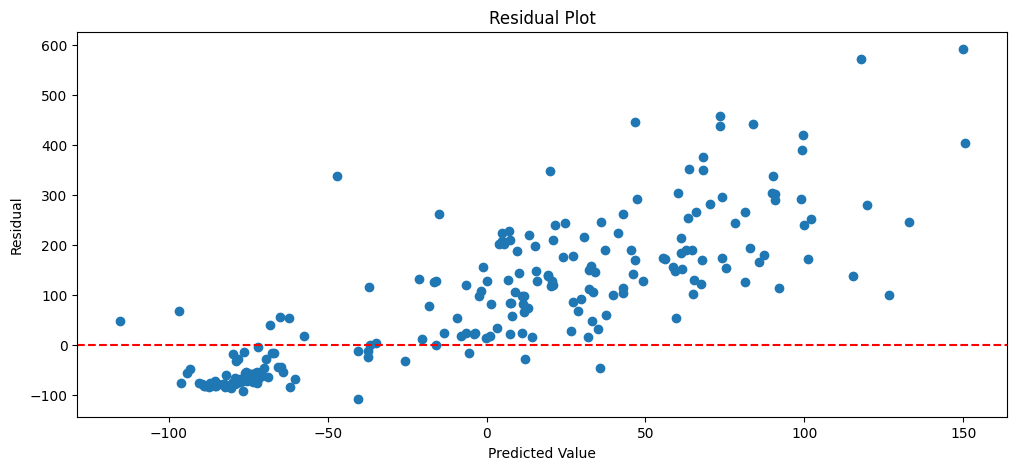

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(model.fittedvalues+exp_model.season, df_train['rainfall(in mm)']-model.fittedvalues+exp_model.season)
# plt.plot(df_train['rainfall(in mm)']-model.fittedvalues+exp_model.season)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

<Figure size 1200x500 with 0 Axes>

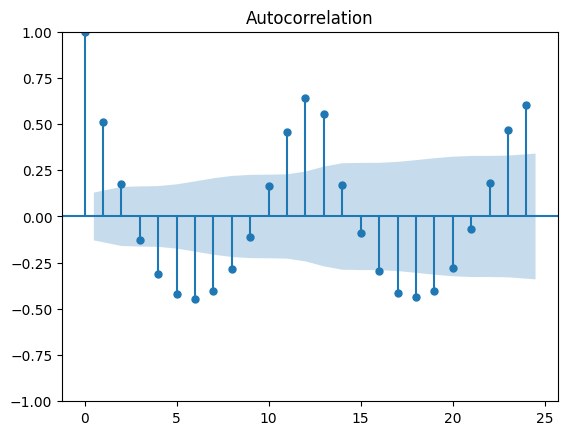

In [ ]:
plt.figure(figsize=(12,5))
plt.suptitle('ACF plot of Residuals')
plot_acf(df_train['rainfall(in mm)']-model.fittedvalues+exp_model.season, lags=24)
plt.show()

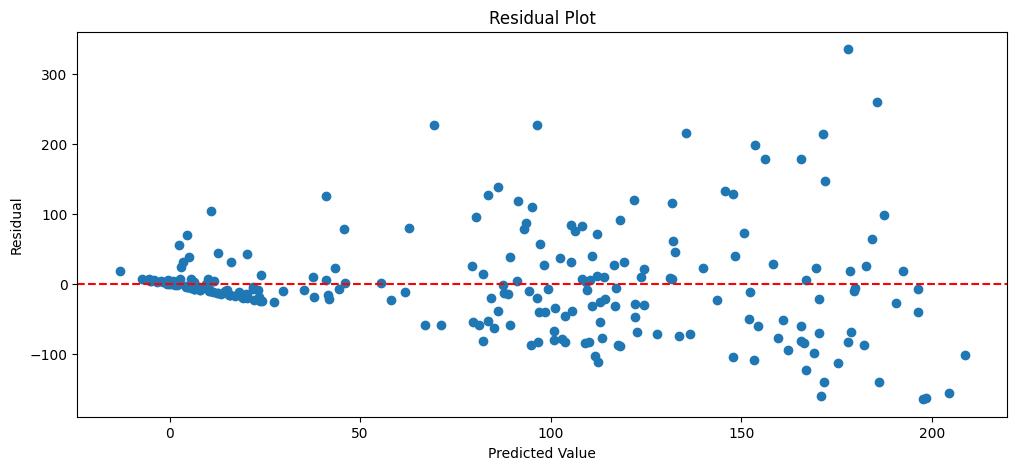

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(exp_model.fittedvalues, df_train['rainfall(in mm)']-exp_model.fittedvalues)
# plt.plot(df_train['rainfall(in mm)']-exp_model.fittedvalues)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

<Figure size 1200x500 with 0 Axes>

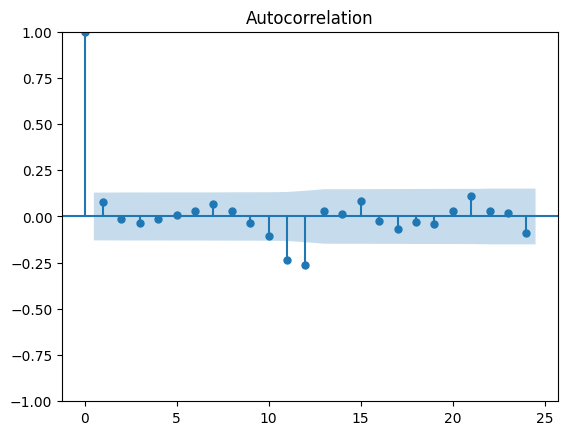

In [ ]:
plt.figure(figsize=(12,5))
plt.suptitle('ACF plot of Residuals')
plot_acf(df_train['rainfall(in mm)']-exp_model.fittedvalues, lags=24)
plt.show()

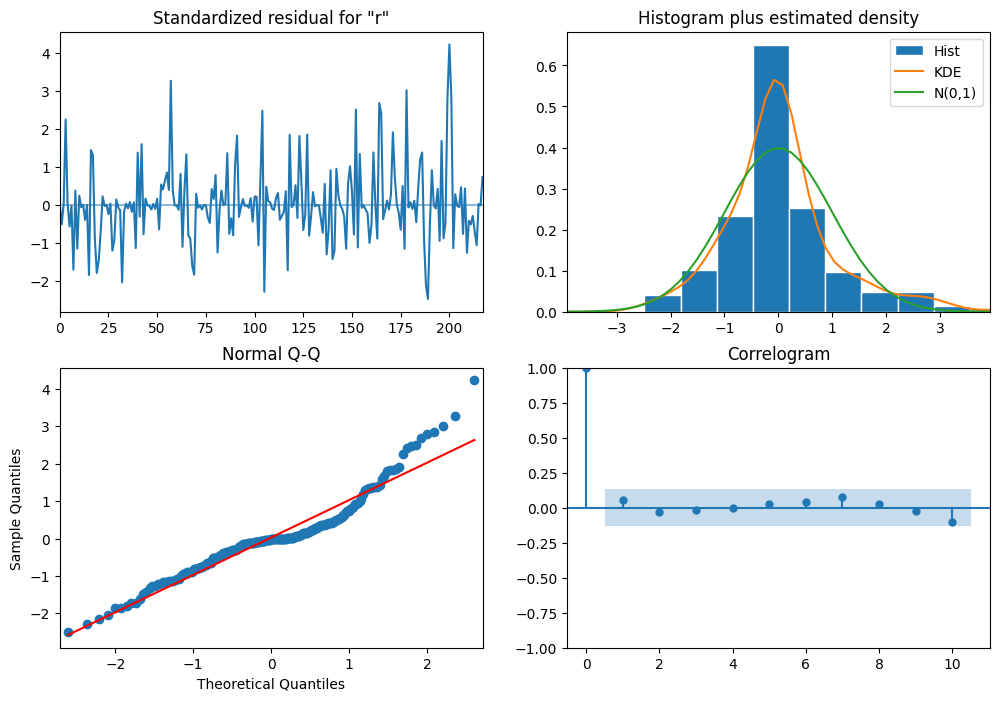

In [ ]:
seasonal_model.plot_diagnostics(figsize=(12, 8))
plt.show()

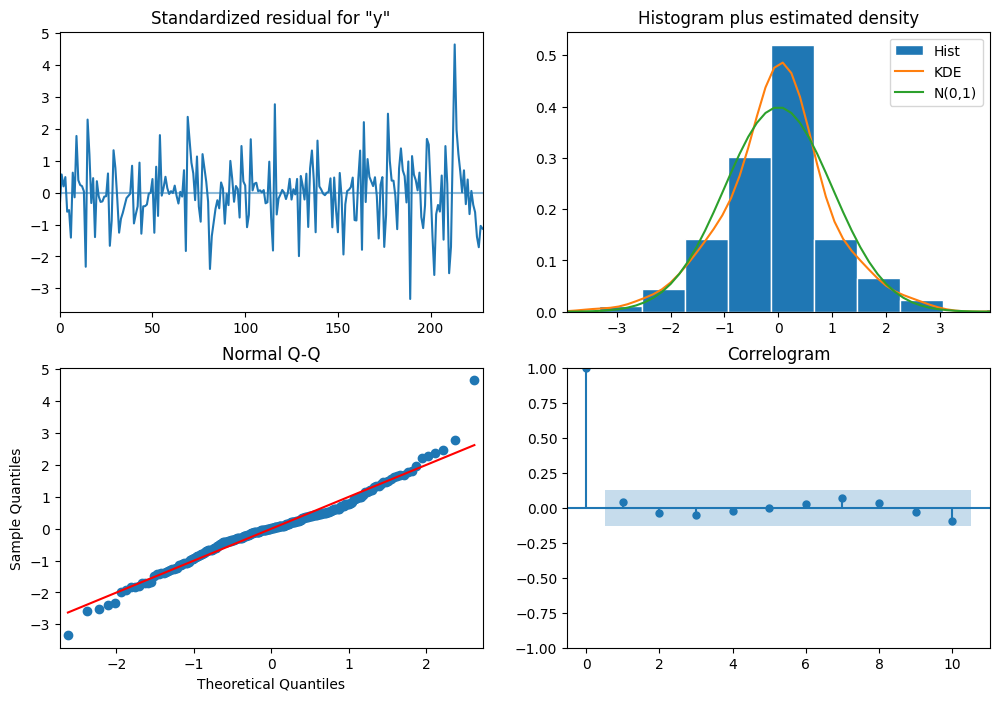

In [ ]:
deseason_model.plot_diagnostics(figsize=(12, 8))
plt.show()